In [38]:
import ast
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 14

arg = "0070"
end = 33.75


file_name = f"merge_data/merge_data_{arg}.txt"

# ###### funktioniert für 0001....0011 #########


def clean_data(data):
    # Filter out invalid entries
    data = ast.literal_eval(data)

    cleaned_data = []
    for row in data:
        try:
            value = int(row[1][0].strip())
            cleaned_data.append([row[0], value])
        except ValueError:
            # Skip rows with invalid integer conversion
            continue

    adjusted_data = [[(sublist[0] - end)*(-1), sublist[1]] for sublist in cleaned_data]

    return adjusted_data

def clean_data_new(data):   
# Convert the data to floats
    data = ast.literal_eval(data)
    
    # converted_data = []
    # for outer in data:
    #     temp = [outer[0]]  # Keep the first element as it is (already a float)
    #     try:
    #         temp.extend(float(inner) for inner in outer[1])  # Convert inner list elements to float and extend the temp list
    #     except ValueError:
    #         continue
    #     converted_data.append(temp)

    # # check for invalid entries
    # valid_data = []
    # invalid_entries = []
    # for i, entry in enumerate(converted_data):
    #     if len(entry) == 5:
    #         # Check if all elements can be converted to float
    #         try:
    #             temp = [float(entry[0])] + [float(x) for x in entry[1:]]
    #             valid_data.append(temp)
    #         except ValueError:
    #             invalid_entries.append(i)
    #     else:
    #         invalid_entries.append(i)
            
    # return valid_data


        # from 0067 (without stage data)

# Initialize lists to store valid data and invalid entry indices
    valid_data = []
    invalid_entries = []

# Process each entry in the data
    for i, entry in enumerate(data):
    # Flatten the outermost list
        if len(entry) == 4:
            try:
            # Convert all elements to float
                float_entry = [float(x) for x in entry]
                valid_data.append(float_entry)
            except ValueError:
            # If conversion fails, add the index to invalid_entries
                invalid_entries.append(i)
        else:
        # If entry does not have exactly four elements, add the index to invalid_entries
            invalid_entries.append(i)

    return valid_data
##################################################
# new type of data from stage with [[31.75, ['50', '52', '12.00', '0']], [33.75, ['57', '52', '11.00', '0']]] format
#### from 0012 on

with open(file_name, "r") as f:
    data = f.read()

valid_data = clean_data_new(data)

serial_data_all = list(map(list, zip(*valid_data)))

#stage_data = serial_data_all[0]
PS_data = serial_data_all[0]
PS_data_avg = serial_data_all[1]
PS_data_dev = serial_data_all[2]
LASER_indicator = serial_data_all[3]

#print(stage_data)




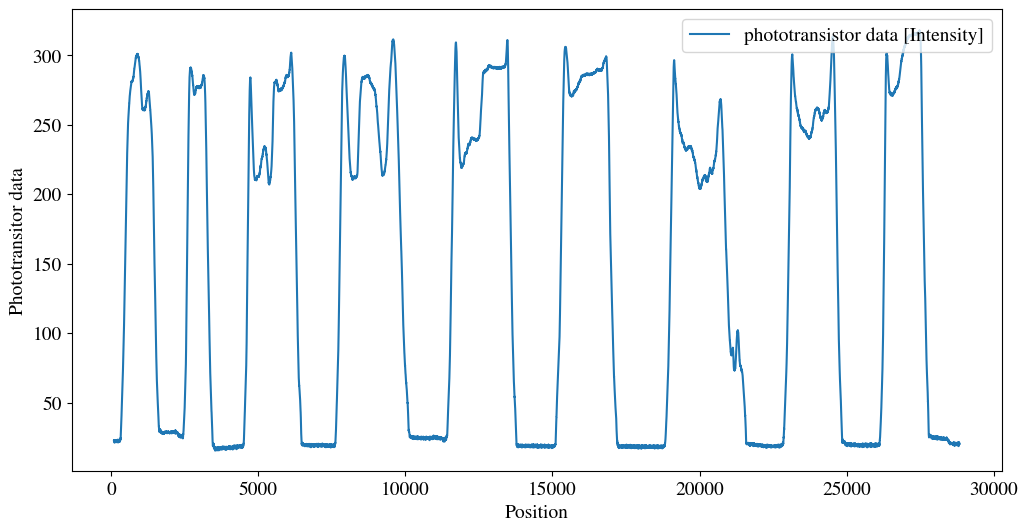

In [39]:
######## from 0012 on ##########

fig, ax = plt.subplots(figsize=(12,6))
#end = len(stage_data)
start = 100
end = len(PS_data)
x = [i for i in range(end)]

#plt.plot(stage_data[start:end], serial_data_all[2][start:end])
#plt.plot(stage_data, serial_data_all[2])
# plot when laser was on! 
#plt.plot(stage_data, [(i*10) for i in serial_data_all[4]])
plt.xlabel('Position')
plt.ylabel('Phototransitor data')

#plt.ylim(0,300)

#plt.plot(x[start:end], stage_data[start:end], label = 'stage position [mm]')
plt.plot(x[start:end], PS_data_avg[start:end], label = "phototransistor data [Intensity]")
# plt.plot(x[start:end], serial_data_all[3][start:end])
# plt.plot(x[start:end], serial_data_all[4][start:end])
plt.legend(loc="upper right")




In [194]:
# find local maxima and minima
from scipy.signal import find_peaks
import numpy as np

def find_min_max_y(serial_data):
    y_max = []
    y_min = []

    max, _ = find_peaks(serial_data, prominence=5, distance=500)
    min, _ = find_peaks(-np.array(serial_data), prominence = 5, distance=500)

    for i in range(len(max)):
        y_max.append(serial_data[max[i]])

    for i in range(len(min)):
        y_min.append(serial_data[min[i]])
    
    return min, max, y_min, y_max

x_min, x_max, y_min, y_max = find_min_max_y(PS_data_avg)


Text(0.5, 0, 'Data points')

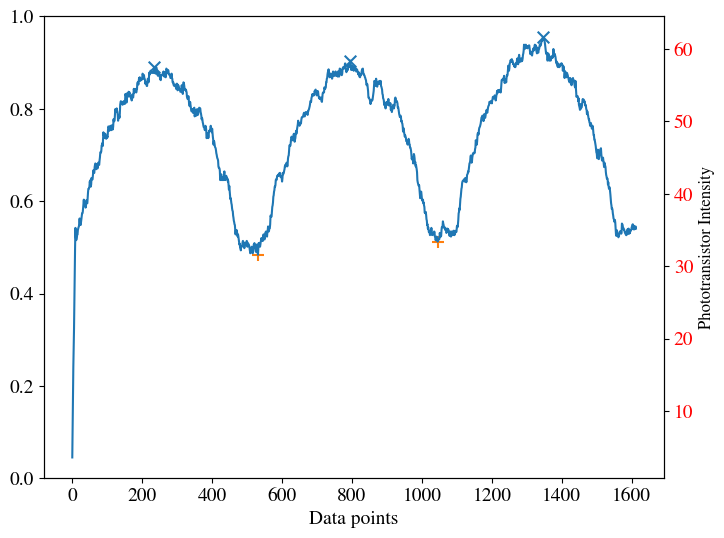

In [195]:
# Plot with stage and sensor data

x = [i for i in range (0, len(PS_data_avg))]

fig, ax1 = plt.subplots(figsize=(8,6))

# ax1.plot([i for i in range (0, len(serial_data))], stage_data, color="blue")
# ax1.set_ylabel(r"Distance to skin $[mm]$", fontsize=12, color="blue")
# for label in ax1.get_yticklabels():
#     label.set_color("blue")

ax2 = ax1.twinx()
ax2.scatter(x_max, y_max, marker = 'x', zorder = 2, s=70)
ax2.scatter(x_min, y_min, marker = '+', zorder = 2, s=70)
ax2.plot(x, serial_data_all[2])
#ax2.plot(x, serial_data, color="lightgrey", zorder =1)

ax2.set_ylabel("Phototransistor Intensity", fontsize=12)
for label in ax2.get_yticklabels():
    label.set_color("red")
    
ax1.set_xlabel(r"Data points")


In [196]:
# Read-in difference tape/no tape
freq= 200             # 200ms -> 5Hz

arg_nt_w = "0003"
arg_nt_lb = "0005"
arg_nt_db = "0004"
arg_t_w = "0019"
arg_t_lb = "0020"
arg_t_db = "0016"

file_name_nt_w = f"merge_data/merge_data_{arg_nt_w}.txt"
file_name_nt_lb = f"merge_data/merge_data_{arg_nt_lb}.txt"
file_name_nt_db = f"merge_data/merge_data_{arg_nt_db}.txt"
file_name_t_w = f"merge_data/merge_data_{arg_t_w}.txt"
file_name_t_lb = f"merge_data/merge_data_{arg_t_lb}.txt"
file_name_t_db = f"merge_data/merge_data_{arg_t_db}.txt"

# Open the data 
with open(file_name_nt_w, "r") as f:
    data_nt_w = f.read()

with open(file_name_nt_lb, "r") as f:
    data_nt_lb = f.read()

with open(file_name_nt_db, "r") as f:
    data_nt_db = f.read()

with open(file_name_t_w, "r") as f:
    data_t_w = f.read()

with open(file_name_t_lb, "r") as f:
    data_t_lb = f.read()

with open(file_name_t_db, "r") as f:
    data_t_db = f.read()

# Remove empty points ('')
# for all data below 0012 use clean_data, above clean_data_new
data_nt_w = clean_data(data_nt_w)
data_nt_lb = clean_data(data_nt_lb)
data_nt_db = clean_data(data_nt_db)
data_t_w = clean_data_new(data_t_w)
data_t_lb = clean_data_new(data_t_lb)
data_t_db = clean_data_new(data_t_db)

print(data_t_w)
# Extract stage and serial data
# data[:,0]
serial_data_nt_w = [sublist[1] for sublist in data_nt_w]
serial_data_nt_lb = [sublist[1] for sublist in data_nt_lb]
serial_data_nt_db = [sublist[1] for sublist in data_nt_db]
serial_data_t_w = [sublist[1] for sublist in data_t_w]
serial_data_t_lb = [sublist[1] for sublist in data_t_lb]
serial_data_t_db = [sublist[1] for sublist in data_t_db]

print(serial_data_t_w)


# Find min/max and the y-values
x_min_nt_w, x_max_nt_w, y_min_nt_w, y_max_nt_w = find_min_max_y(serial_data_nt_w)
x_min_nt_lb, x_max_nt_lb, y_min_nt_lb, y_max_nt_lb = find_min_max_y(serial_data_nt_lb)
x_min_nt_db, x_max_nt_db, y_min_nt_db, y_max_nt_db = find_min_max_y(serial_data_nt_db)
x_min_t_w, x_max_t_w, y_min_t_w, y_max_t_w = find_min_max_y(serial_data_t_w)
x_min_t_lb, x_max_t_lb, y_min_t_lb, y_max_t_lb = find_min_max_y(serial_data_t_lb)
x_min_t_db, x_max_t_db, y_min_t_db, y_max_t_db = find_min_max_y(serial_data_t_db)



[[33.99750990160839, 30.0, 3.0, -3.0, 1.0], [32.67749725319412, 35.0, 6.5, -6.0, 0.0], [32.509822395480036, 31.0, 9.6, -9.0, 0.0], [32.38955026764785, 32.0, 12.8, -12.0, 0.0], [32.222049046306964, 32.0, 16.0, -16.0, 0.0], [32.05379540068224, 29.0, 18.9, -18.0, 0.0], [31.93407312136516, 32.0, 22.1, -22.0, 0.0], [31.766195687882355, 30.0, 25.1, -25.0, 0.0], [31.645923560050164, 29.0, 28.0, -28.0, 0.0], [31.47807506596289, 31.0, 31.1, -28.0, 0.0], [31.310921117368395, 30.0, 31.1, -25.0, 0.0], [31.191140959260252, 28.0, 30.4, -21.0, 0.0], [31.02256898028467, 29.0, 30.2, -18.0, 0.0], [30.85474942559293, 29.0, 29.9, -13.0, 0.0], [30.735113964462453, 31.0, 29.8, -11.0, 0.0], [30.567352288561775, 33.0, 30.2, -8.0, 0.0], [30.447051221334053, 31.0, 30.1, -5.0, 0.0], [30.279029090873586, 31.0, 30.2, -2.0, 0.0], [30.11138317255504, 30.0, 30.3, 1.0, 0.0], [29.992181802357543, 35.0, 30.7, 1.0, 0.0], [29.823754520359625, 34.0, 31.1, -1.0, 0.0], [29.65628223841427, 33.0, 31.6, -1.0, 0.0], [29.53612586

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

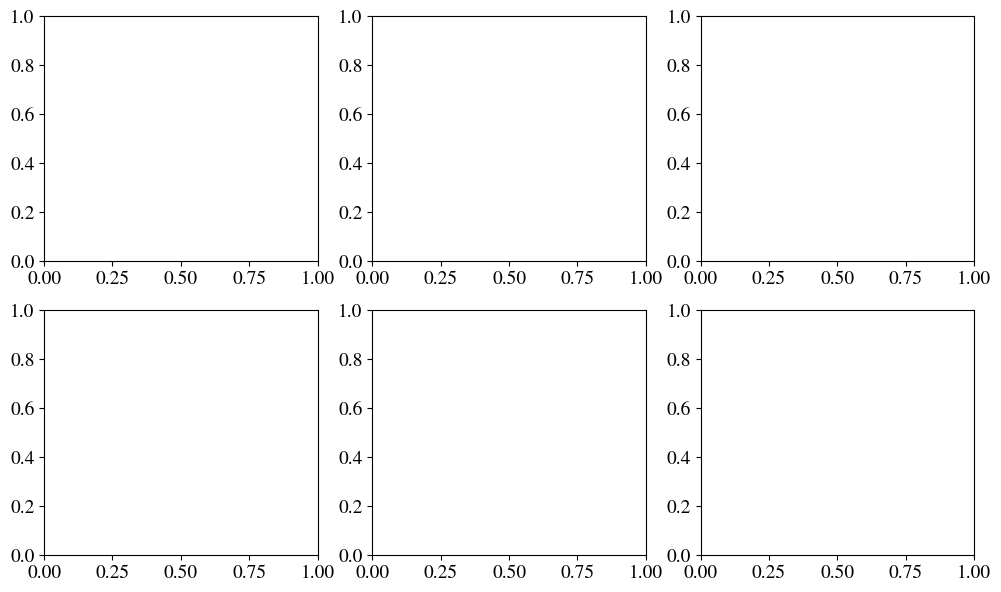

In [197]:
# Plot difference tape/no tape 
import seaborn as sns

fig, ax = plt.subplots(2,3, figsize=(12,7))
size = 60

# ax[0,0].plot([i for i in range (0, len(serial_data_nt_w))], serial_data_nt_w)
ax[0].scatter([i for i in range(len(y_max_nt_w))], y_max_nt_w, marker = '.', zorder = 2, s=size)
ax[0].scatter([i for i in range(len(y_min_nt_w))], y_min_nt_w, marker = '+', zorder = 2, s=size)
# ax[0,1].plot([i for i in range (0, len(serial_data_nt_lb))], serial_data_nt_lb)
ax[1].scatter([i for i in range(len(y_max_nt_lb))], y_max_nt_lb, marker = '.', zorder = 2, s=size)
ax[1].scatter([i for i in range(len(y_min_nt_lb))], y_min_nt_lb, marker = '+', zorder = 2, s=size)
# ax[0,2].plot([i for i in range (0, len(serial_data_nt_db))], serial_data_nt_db)
ax[0,2].scatter([i for i in range(len(y_max_nt_db))], y_max_nt_db, marker = '.', zorder = 2, s=size, label = "maximum")
ax[0,2].scatter([i for i in range(len(y_min_nt_db))], y_min_nt_db, marker = '+', zorder = 2, s=size, label = "minimum")
# ax[1,0].plot([i for i in range (0, len(serial_data_t_w))], serial_data_t_w)
ax[1,0].scatter([i for i in range(len(y_max_t_w))], y_max_t_w, marker = '.', zorder = 2, s=size)
ax[1,0].scatter([i for i in range(len(y_min_t_w))], y_min_t_w, marker = '+', zorder = 2, s=size)
# ax[1,1].plot([i for i in range (0, len(serial_data_t_lb))], serial_data_t_lb)
ax[1,1].scatter([i for i in range(len(y_max_t_lb))], y_max_t_lb, marker = '.', zorder = 2, s=size)
ax[1,1].scatter([i for i in range(len(y_min_t_lb))], y_min_t_lb, marker = '+', zorder = 2, s=size)
# ax[1,2].plot([i for i in range (0, len(serial_data_t_db))], serial_data_t_db)
ax[1,2].scatter([i for i in range(len(y_max_t_db))], y_max_t_db, marker = '.', zorder = 2, s=size)
ax[1,2].scatter([i for i in range(len(y_min_t_db))], y_min_t_db, marker = '+', zorder = 2, s=size)

# set labels
ax[0,0].set(ylabel='Intensity')
ax[1,0].set(xlabel='# of cycle', ylabel='Intensity')
ax[1,1].set(xlabel='# of cycle')
ax[1,2].set(xlabel='# of cycle')

# set titles
ax[0,0].set_title('white silicon')
ax[0,1].set_title('light brown silicon')
ax[0,2].set_title('dark brown silicon')
fig.text(0.04, 0.7, 'Without tape', va='center', ha='center', rotation='vertical', fontsize=16)
fig.text(0.04, 0.28, 'With tape', va='center', ha='center', rotation='vertical', fontsize=16)

ax[0,2].legend(loc="upper right")

ax[1,0].set_ylim([0,200])   
ax[1,1].set_ylim([0,200])   
ax[1,2].set_ylim([0,200]) 
ax[0,0].set_ylim([0,650])   
ax[0,1].set_ylim([0,650])   
ax[0,2].set_ylim([0,650])   

for axis in ax.flat:
  
    #axis.set_xlim([0,51])
    axis.set_xticks([0,10,20,30,40,50])
    sns.despine()

In [45]:
# Load, modify and store data in dataframes

from scipy.signal import find_peaks
import ast
import numpy as np
import pandas as pd
import statistics
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 12

#args = ['0019', '0014', '0015', '0021', '0018', '0022']
#args = ['0021', '0023', '0022']                                             # full range measurement with 470kOhm, 50 rounds
#args = ['0054', '0056', '0055']                                             # full range measurement with 470kOhm, 50 rounds
#args = ['0058','0060','0062','0057','0059','0061','0063','0064','0065']    # 12...47 mm, compare no/white/IR LED, 10 rounds each, rows: LED, cols: phantom
args = ['0058','0057','0063','0060','0059','0064','0062','0061','0065']
norm = [47,47,47,47,47,47,47,47,47]
frames = []
buffer_size = 10
dev_ps = [3,3,3,3,3,3,3,3,3]
threshold = [60,60,60,50,50,50,40,40,40]



def clean_data_new(data):   
# Convert the data to floats
    data = ast.literal_eval(data)
    
    # for data of format [[x, [y,x,v]],[,[,,,]]....]
    # up to 0066
    converted_data = []
    for outer in data:
        temp = [outer[0]]  # Keep the first element as it is (already a float)
        try:
            temp.extend(float(inner) for inner in outer[1])  # Convert inner list elements to float and extend the temp list
        except ValueError:
            continue
        converted_data.append(temp)

    # check for invalid entries
    valid_data = []
    invalid_entries = []
    for i, entry in enumerate(converted_data):
        if len(entry) == 5:
            # Check if all elements can be converted to float
            try:
                temp = [float(entry[0])] + [float(x) for x in entry[1:]]
                valid_data.append(temp)
            except ValueError:
                invalid_entries.append(i)
        else:
            invalid_entries.append(i)


# Output the valid data and invalid entry indices
    # print("Valid data:", valid_data)
    # print("Invalid entries at indices:", invalid_entries)
            
    return valid_data

def find_min_max_y(serial_data):
    y_max = []
    y_min = []

    max, _ = find_peaks(serial_data, prominence=5, distance=250)
    min, _ = find_peaks(-np.array(serial_data), prominence = 5, distance=250)

    for i in range(len(max)):
        y_max.append(serial_data[max[i]])

    for i in range(len(min)):
        y_min.append(serial_data[min[i]])
    
    return min, max, y_min, y_max

def determine_led_state_dev(dev_list, dev):
    led_state_dev = []
    for i in range(buffer_size-1):
        led_state_dev.append(0)

    dev_list = dev_list[buffer_size-1:len(dev_list)]
    for row in dev_list:
        if all(-(dev) <= value <= dev for value in row):
            led_state_dev.append(1)
        else:
            led_state_dev.append(0)

    return led_state_dev
    
def determine_led_state(led_state_dev, average, threshold):
    led_state = []

    for i in range(len(average)):
        if ((average[i] < threshold) and (led_state_dev[i] == 1)):
            led_state.append(1)
        else:   
            led_state.append(0)

    return led_state       

def deviation(dev):
    dev_list = []
    for i in range(buffer_size-1):
        dev_list.append(0)

    for i in range(buffer_size, len(dev)+1): 
        temp = []
        for j in range(buffer_size):
            temp.append(dev[(i-buffer_size)+j])
        dev_list.append(temp)

    return dev_list


for arg in range(len(args)):
    file_index = args[arg]

    file_name = f"merge_data/merge_data_{file_index}.txt"

    # Open the data 
    with open(file_name, "r") as f:
        data = f.read()

    # Remove empty points ('')
    data = clean_data_new(data)

    # cut off weird minima in the beginning
    data = data[100:len(data)]

    # transpose data
    data_transposed = list(map(list, zip(*data)))
    
    # correct stage data by corresponding end value
    # data_transposed[0]  =  list((np.array(data_transposed[0]) - norm[arg])*(-1))
    data_transposed[0]  =  list((np.array(data_transposed[0]) - norm[arg]))

    dev_list = deviation(data_transposed[3])
    led_state_dev = determine_led_state_dev(dev_list, dev_ps[arg])
    # calculate final LED state
    
    laser_pt = determine_led_state(led_state_dev, data_transposed[2], threshold[arg])
    # Find min/max and the y-values (averages)
    x_min, x_max, y_min, y_max = find_min_max_y(data_transposed[2])

    min = { 'index': [i for i in range(len(y_min))],
            'x_min': x_min,
            'y_min': y_min} 
    max = { 'index': [i for i in range(len(y_max))],
            'x_max': x_max,
            'y_max': y_max}

    sensor_data = {'stage': data_transposed[0],
                       'raw': data_transposed[1],
                       'avg': data_transposed[2],
                       'dev': data_transposed[3],
                       'led': data_transposed[4],
                       'laser_pt' : laser_pt}
    
    pd_data = pd.DataFrame(data=sensor_data)
    pd_min = pd.DataFrame(data=min)
    pd_max = pd.DataFrame(data=max)

    frames.append([file_index, pd_data, pd_min, pd_max])


In [46]:
# make math with data
calcs = []
lin_reg = []

def func(x, a, b):
    y = []
    for i in range(len(x)):
        y.append(x[i]*a + b)
    return y

def find_batches(x, stage):
    pos = []

    in_batch = False
    for i in range(len(x)):
        if x[i] == 1 and not in_batch:
            pos.append(i)
            in_batch = True
        elif x[i] == 0 and in_batch:
            pos.append(i - 1)
            in_batch = False
    if in_batch:
        pos.append(len(x) - 1)

    x_list = [-30]          # für steps
    for i in pos:
       x_list.append(stage[i])  
    x_list.append(4)        # für steps

    return x_list


for i in range(len(args)):
    # calculate standart deviation
    std_min = np.std(list(frames[i][2].y_min))
    std_max = np.std(list(frames[i][3].y_max))

    # caluclate mean
    avg_min = statistics.mean(frames[i][2].y_min)
    avg_max = statistics.mean(frames[i][3].y_max)

    # make linear regression for min values
    popt_min, _ = curve_fit(func, frames[i][2].index, frames[i][2].y_min)
    popt_max, _ = curve_fit(func, frames[i][3].index, frames[i][3].y_max)

    y_min_temp = list(frames[i][2].y_min)
    drift = []
    
    for n in range(2, len(frames[i][2].y_min)):
        drift.append((y_min_temp[n]/y_min_temp[1])*100)

    # calculate dev array

    # calculate LED deviation state

        
    x_acc_pt = find_batches(list(frames[i][1].laser_pt),list(frames[i][1].stage))
    x_acc_pt.sort()
    # mean without additional values for step
    mean_pt = round(np.mean(x_acc_pt[1:len(x_acc_pt)-1]),2)
    std_pt = round(np.std(x_acc_pt[1:len(x_acc_pt)-1]), 2)
    
    calcs.append([args[i], std_min, std_max, avg_min, avg_max, popt_min, popt_max, drift, dev_list, x_acc_pt, mean_pt, std_pt])
    #[args[i], std_min, std_max, avg_min, avg_max, popt_min, popt_max, drift, dev_list, led_state, x_acc_pt, mean_pt, std_pt]



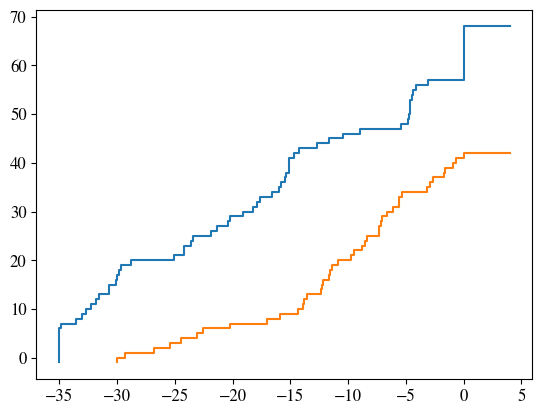

In [37]:
y_0 = [i-1 for i in range(len(calcs[1][9]))]
y_1 = [i-1 for i in range(len(calcs[8][9]))]

plt.step(calcs[1][9],y_0, color = 'C0')
plt.step(calcs[8][9],y_1, color = 'C1')

In [ ]:
# make big 3x3 plot for LED comparison (over # cycles)

import seaborn as sns
import matplotlib.patches as patches

fig, axs = plt.subplots(3,3, figsize=(12,12))
size = 60
plt.rcParams['font.size'] = 16

def make_text():
    # # set labels
    axs[0,0].set(ylabel='Intensity')
    axs[1,0].set(ylabel='Intensity')
    axs[2,0].set(ylabel='Intensity',xlabel='# of cycle')
    axs[2,1].set(xlabel='# of cycle')
    axs[2,2].set(xlabel='# of cycle')

    # # set titles
    axs[0,0].set_title('white skin phantom', weight='bold', fontsize=16)
    axs[0,1].set_title('light brown skin phantom', weight='bold', fontsize=16)
    axs[0,2].set_title('dark brown skin phantom', weight='bold', fontsize=16)

    fig.text(0.5, 0.93, 'Phototransistor measurements, range 12...47mm, different skin tones', va='center', ha='center', rotation='horizontal', fontsize=18, weight='bold')

    fig.text(0.04, 0.77, 'No LED', va='center', ha='center', rotation='vertical', fontsize=16, weight='bold')
    fig.text(0.04, 0.5, 'White LED', va='center', ha='center', rotation='vertical', fontsize=16, weight='bold')
    fig.text(0.04, 0.22, 'IR LED', va='center', ha='center', rotation='vertical', fontsize=16, weight='bold')

for i, ax in enumerate(axs.flatten()):
    # frames = [file_index, pd_data, pd_min, pd_max]
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)

    textstr = '\n'.join((
    r'$\mu_{max}=%.2f$' % (round(calcs[i][4], 2), ),
    r'$\sigma_{max}=%.2f$' % (round(calcs[i][2], 2), ),
    r'$\mu_{min}=%.2f$' % (round(calcs[i][3], 2), ),
    r'$\sigma_{min}=%.2f$' % (round(calcs[i][1], 2), )))

    # frames[i][1].avg
    y_min_temp = np.array(list(frames[i][2].y_min))
    y_max_temp = np.array(list(frames[i][3].y_max))
    
    min_max = y_max_temp.min()
    max_min = y_min_temp.max()

    ax.add_patch(patches.Rectangle((0,max_min), 10,min_max-max_min ,linewidth=0, color='grey', alpha=0.20))

    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    ax.scatter(list(frames[i][2].index), list(frames[i][2].y_min), marker = '+', zorder = 2, s=size, label = 'min')
    ax.scatter(list(frames[i][3].index), list(frames[i][3].y_max), marker = '.', zorder = 2, s=size, label = 'max')
    
    ax.legend(loc="upper right")

    ax.set_ylim([0,240])

    sns.despine()

make_text()


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

C:\Users\Anna\AppData\Local\Temp\ipykernel_13484\773674565.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,0].set_yticklabels(ylabels)
C:\Users\Anna\AppData\Local\Temp\ipykernel_13484\773674565.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_yticklabels(ylabels)
C:\Users\Anna\AppData\Local\Temp\ipykernel_13484\773674565.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2,0].set_yticklabels(ylabels)


<class 'numpy.ndarray'>


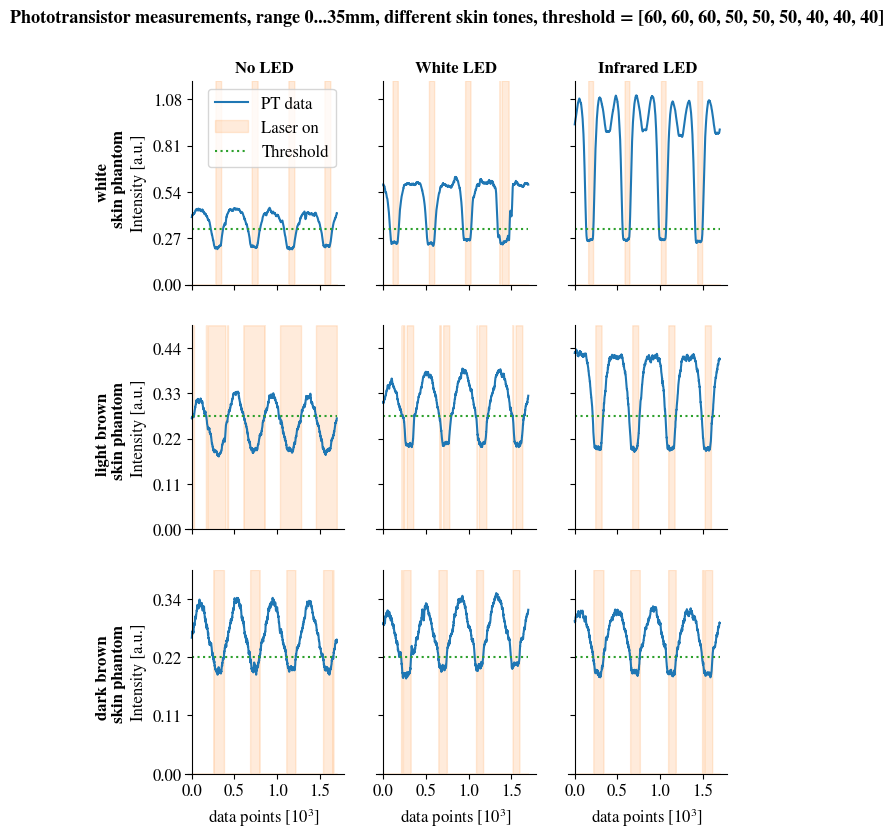

In [53]:
# make big 3x3 plot for LED comparison (over # cycles), include LASER on/off
# or 1x3 
import seaborn as sns
import matplotlib.patches as patches

fig, axs = plt.subplots(3,3, figsize=(7,9))

end = 1700
#end = len(list(frames[0][1].stage))
ylim_0=220
ylim_1=90
ylim_2=70

size = 60
fs = 12
plt.rcParams['font.size'] = 12


def make_text():
    # axis specific stuff, outside loop
    # # set labels
    axs[0,0].set(ylabel='Intensity [a.u.]')
    axs[1,0].set(ylabel='Intensity [a.u.]')
    axs[2,0].set(ylabel='Intensity [a.u.]',xlabel='data points [$10^{3}$]')
    axs[2,1].set(xlabel='data points [$10^{3}$]')
    axs[2,2].set(xlabel='data points [$10^{3}$]')
    ylabels = ['{:,.2f}'.format(y) for y in np.array([0.,int(ylim_0/4), int(ylim_0/2),int(ylim_0*3/4),ylim_0])*5/1023]
    axs[0,0].set_yticklabels(ylabels) 
    ylabels = ['{:,.2f}'.format(y) for y in np.array([0.,int(ylim_1/4), int(ylim_1/2),int(ylim_1*3/4),ylim_1])*5/1023]
    axs[1,0].set_yticklabels(ylabels) 
    ylabels = ['{:,.2f}'.format(y) for y in np.array([0., int(ylim_2/3),int(ylim_2*2/3),ylim_2])*5/1023]
    axs[2,0].set_yticklabels(ylabels) 

    # # set titles
    axs[0,0].set_title('No LED', weight='bold', fontsize=fs)
    axs[0,1].set_title('White LED', weight='bold', fontsize=fs)
    axs[0,2].set_title('Infrared LED', weight='bold', fontsize=fs)

    axs[0,1].set_yticklabels([])        
    axs[1,1].set_yticklabels([])
    axs[2,1].set_yticklabels([])    
    axs[0,2].set_yticklabels([])
    axs[1,2].set_yticklabels([])
    axs[2,2].set_yticklabels([])

    fig.text(0.5, 0.95, f"Phototransistor measurements, range 0...35mm, different skin tones, threshold = {threshold}", va='center', ha='center', rotation='horizontal', fontsize=fs+1, weight='bold')
    fig.text(0.02, 0.77, 'white \n skin phantom', va='center', ha='center', rotation='vertical', fontsize=fs, weight='bold')
    fig.text(0.02, 0.49, 'light brown \n skin phantom', va='center', ha='center', rotation='vertical', fontsize=fs, weight='bold')
    fig.text(0.02, 0.22, 'dark brown \n skin phantom', va='center', ha='center', rotation='vertical', fontsize=fs, weight='bold')

for i, ax in enumerate(axs.flatten()):
    ax.set_xticks([0,500,1000,1500])
    ax.spines['left'].set_position('zero')

    if i == 0:
        ax.plot(list(frames[i][1].index)[0:end], list(frames[i][1].avg)[0:end], label = 'PT data')
        print(list(frames[i][1].index)[0:end])
        print(ylim_0*np.array(list(frames[i][1].laser_pt)[0:end]))
        ax.fill_between(list(frames[i][1].index)[0:end], ylim_0*np.array(list(frames[i][1].laser_pt)[0:end]), color='C1', alpha=0.15, label='Laser on')
        ax.hlines(y=threshold[i], xmin=0, xmax=end, color='C2', ls=':', label = 'Threshold')
        ax.set_ylim([0,ylim_0])
        ax.set_xticklabels([])

        ax.legend(loc="upper right")

    else:
        if i in [1,2]:

            ax.fill_between(list(frames[i][1].index)[0:end], ylim_0*np.array(list(frames[i][1].laser_pt)[0:end]), color='C1', alpha=0.15)
            ax.set_ylim([0,ylim_0])
            ax.set_xticklabels([])

        elif i in [3,4,5]:
            ax.fill_between(list(frames[i][1].index)[0:end], ylim_1*np.array(list(frames[i][1].laser_pt)[0:end]), color='C1', alpha=0.15)
            ax.set_ylim([0,ylim_1])
            ax.set_xticklabels([])

        elif i in [6,7,8]:
            ax.fill_between(list(frames[i][1].index)[0:end], ylim_2*np.array(list(frames[i][1].laser_pt)[0:end]), color='C1', alpha=0.15)
            ax.set_ylim([0,ylim_2])
            xlabels = ['{:,.1f}'.format(x) for x in ax.get_xticks()/1000]
            ax.set_xticklabels(xlabels)



        ax.plot(list(frames[i][1].index)[0:end], list(frames[i][1].avg)[0:end])
        ax.hlines(y=threshold[i], xmin=0, xmax=end, color='C2', ls=':')

sns.despine()
make_text()

print(type(axs[0,0].get_yticks()))
# name_file = f"PT_compare_LED_threshold_{threshold}_buffer_{buffer_size}_vs_cycle"
# plt.savefig(f"../../../LaTex/Master Thesis/figures/{name_file}.pdf")
# plt.savefig(f"../../../LaTex/Master Thesis/figures/{name_file}.png")



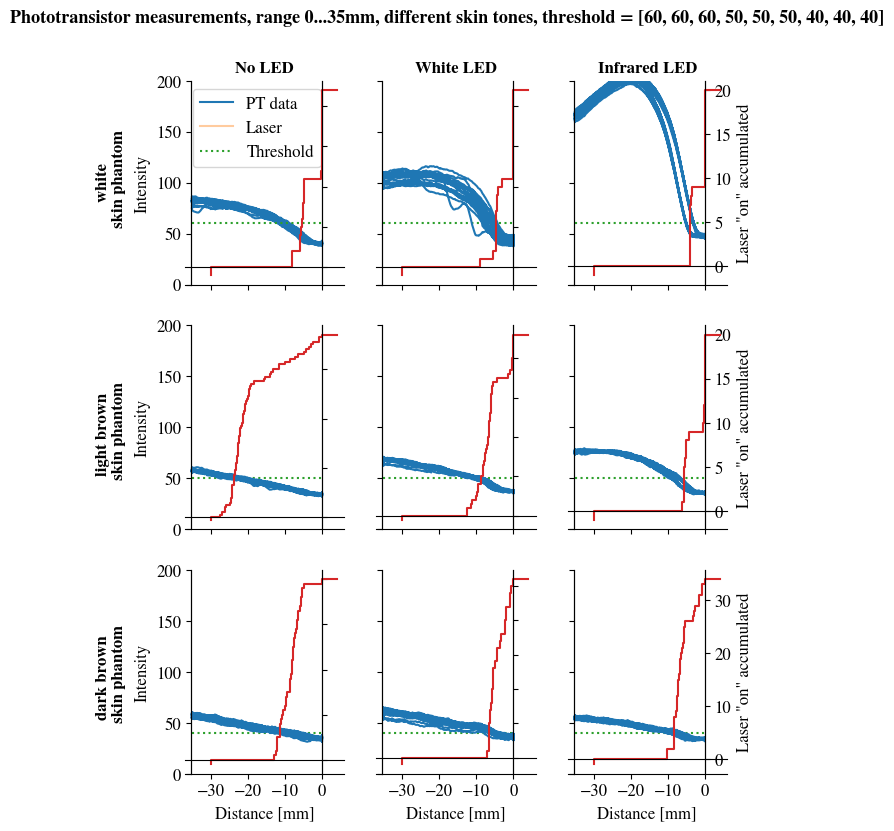

In [59]:
# make big 3x3 plot for LED comparison (over # cycles), include LASER on/off
# or 1x3 
import seaborn as sns
import matplotlib.patches as patches

fig, axs = plt.subplots(3,3, figsize=(7,9))
axs_twin = [[ax.twinx() for ax in row] for row in axs]
axs_twin_flat = [ax for row in axs_twin for ax in row]

#end = 1700
end = len(list(frames[0][1].stage))
ylim_0=200
ylim_1=200
ylim_2=200

fs = 12
plt.rcParams['font.size'] = 12

def make_text():
    # axis specific stuff, outside loop
    # # set labels
    axs[0,0].set(ylabel='Intensity')
    axs[1,0].set(ylabel='Intensity')
    axs[2,0].set(ylabel='Intensity',xlabel='Distance [mm]')
    axs[2,1].set(xlabel='Distance [mm]')
    axs[2,2].set(xlabel='Distance [mm]')

    # # set titles
    axs[0,0].set_title('No LED', weight='bold', fontsize=fs)
    axs[0,1].set_title('White LED', weight='bold', fontsize=fs)
    axs[0,2].set_title('Infrared LED', weight='bold', fontsize=fs)

    axs[0,1].set_yticklabels([])
    axs[1,1].set_yticklabels([])
    axs[2,1].set_yticklabels([])    
    axs[0,2].set_yticklabels([])
    axs[1,2].set_yticklabels([])
    axs[2,2].set_yticklabels([])

    fig.text(0.5, 0.95, f"Phototransistor measurements, range 0...35mm, different skin tones, threshold = {threshold}", va='center', ha='center', rotation='horizontal', fontsize=fs+1, weight='bold')
    fig.text(0.02, 0.77, 'white \n skin phantom', va='center', ha='center', rotation='vertical', fontsize=fs, weight='bold')
    fig.text(0.02, 0.49, 'light brown \n skin phantom', va='center', ha='center', rotation='vertical', fontsize=fs, weight='bold')
    fig.text(0.02, 0.22, 'dark brown \n skin phantom', va='center', ha='center', rotation='vertical', fontsize=fs, weight='bold')

for i, ax in enumerate(axs.flatten()):
    ax.set_xticks([-30,-20,-10,0])

    ax.spines['left'].set_position(('data', -35.3))
    ax.spines['bottom'].set_position(('data', 0))    
    ax.spines['right'].set_position(('data', 0))

    if i == 0:
        ax.plot(list(frames[i][1].stage)[0:end], list(frames[i][1].avg)[0:end], label = 'PT data')
        ax.plot([],[],color='C1', alpha=0.4,label = 'Laser')
        ax.hlines(y=threshold[i], xmin=-35, xmax=0, color='C2', label = 'Threshold', ls=':')
        ax.set_ylim([0,ylim_0])
        ax.set_xticklabels([])
        ax.legend(loc="upper left")

    else:
        if i in [1,2]:
            ax.hlines(y=threshold[i], xmin=-35, xmax=0, color='C2', ls=':')
            ax.set_ylim([0,ylim_0])
            ax.set_xticklabels([])

        elif i in [3,4,5]:
            ax.hlines(y=threshold[i], xmin=-35, xmax=0, color='C2', ls=':')
            ax.set_ylim([0,ylim_1])
            ax.set_xticklabels([])

        elif i in [6,7,8]:
            ax.hlines(y=threshold[i], xmin=-35, xmax=0, color='C2', ls=':')
            ax.set_ylim([0,ylim_2])

        ax.plot(list(frames[i][1].stage)[0:end], list(frames[i][1].avg)[0:end])
        #ax.hlines(y=threshold[i], xmin=-35, xmax=0, color='C2', ls=':')

for i, ax2 in enumerate(axs_twin_flat):
    ax2.spines['right'].set_position(('data', 0))
    ax2.spines['left'].set_position(('data', -35.3))
    ax2.spines['bottom'].set_position(('data', 0))

    #ax2.plot(list(calcs[i][10]), list(calcs[i][11]), alpha= 0.4 ,color = 'C1')
    y = [i-1 for i in range(len(calcs[i][9]))]
    ax2.step(calcs[i][9],y, color = 'C3')

    # ax2.set_ylim([0,40])

    if i in [2,5,8]:
        ax2.set(ylabel='Laser "on" accumulated')
    else:
        ax2.set_yticklabels([])

sns.despine(top = True, right = False)
make_text()

# name_file = f"PT_compare_LED_threshold_{threshold}_buffer_{buffer_size}_vs_position"
# plt.savefig(f"../../../LaTex/Master Thesis/figures/{name_file}.pdf")
# plt.savefig(f"../../../LaTex/Master Thesis/figures/{name_file}.png")
